## 1. Connecting to PostgreSQL Database and Verifying Data Existence
- We'll use SQLAlchemy to establish a connection to query
- It should connect to the 'social_media_db' we create from the service in the docker-compose.yml
- In the data pipeline section, we created 3 tables: channels, videos, and comments
- To confirm we successfully load all the YouTube social media data, we query counting and print them for verifying Airflow ETL pipeline works.


In [1]:
#source .venv/bin/activate
#jupyter lab

### Define Credentials

In [1]:
from sqlalchemy import create_engine, text
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec

Python(18921) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [2]:
# Define database, which match the 'social_media_db' service in the docker-compose.yml.
# which Docker exposes the service on localhost and "5433:5432" in docker-compose.yml.
user = 'postgres'
password = 'postgres'
host = 'localhost' 
port = 5433         
database = 'social_media_db'

### Create Connection Engine and Test It

In [3]:
# Construct the connection string in PostgreSQL URI format.
conn_string = f"postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}"

# Create the SQLAlchemy engine.
engine = create_engine(conn_string)  

# Test the connection 
try:
    with engine.connect() as conn:
        result = conn.execute(text("SELECT 1 AS test;"))
        test_value = result.scalar()  # Fetch single value.
    
    if test_value == 1:
        print(f"Connection successful! Connected to {database} on {host}:{port} as {user}.")
        print("Database is ready for queries.")
    else:
        print("Connection test failed unexpectedly.")
        
except Exception as e:
    print(f"Connection error: {e}")
    print("Troubleshooting: Check Docker status (`docker ps`), port forwarding, or credentials.")

Connection successful! Connected to social_media_db on localhost:5433 as postgres.
Database is ready for queries.


### Check 'channels' Table
- The channels table stores YouTube channel metadata which scratch from the ETL process
- You can see features like channel_id, title, subscriber_count
- Insight:
- based on the **"Statistical Summary"**, subscribers and view are **widely dispersed**, but the **total_videos** are similar.

In [4]:
# Define query row count for verification.
count_query = 'SELECT COUNT(*) AS total_rows FROM channels;'

# Also print the first 5 row samples from channels table.
query_channels = 'SELECT * FROM channels;'

# Use SQLAlchemy's native execution
with engine.connect() as conn:
        
    # Execute count query.
    count_result = conn.execute(text(count_query))
    total_channels = count_result.scalar()
    print(f"Total rows: {total_channels}")
    
    # print first 5 rows from channels table
    df_channels = conn.execute(text(query_channels))
    df_channels = pd.DataFrame(df_channels.fetchall(), columns=df_channels.keys())
    print(f"Shape: {df_channels.shape} (rows, columns)")
    print("\nFirst 5 rows:")
    display(df_channels.head(5))  
    
    # stats
    print("\nStatistical Summary:")
    display(df_channels.describe())
    
    print("\nMissing Values per Column:")
    display(df_channels.isnull().sum())

Total rows: 6
Shape: (6, 6) (rows, columns)

First 5 rows:


,channel_id,channel_name,views,total_videos,subscribers,updated_at
0,UC8OVLoXv7B1BdOVV44Dz3ig,Project Umbrella,1318164,236,20100,2025-11-10 06:32:58.995
1,UC7OUGIPx0HIB5HA2OSL-Zhg,MW Insurance Academe 保險為什麼,799045,1857,5400,2025-11-10 06:32:58.995
2,UCD5Lx-3KCYZzCzGF2A60STg,Bowtie Insurance 保泰人壽,52672852,338,85700,2025-11-10 06:32:58.995
3,UCFfbH3zDLa47d4nfotQ349Q,投資最容易,3317417,395,34900,2025-11-10 06:32:58.995
4,UCxQfqaw1i39eBQG1YJDbDkw,UTOPIA HK,623473,326,4170,2025-11-10 06:32:58.995



Statistical Summary:


,views,total_videos,subscribers,updated_at
count,6.000000e+00,6.00000,6.000000,6
mean,1.026350e+07,598.00000,31678.333333,2025-11-10 06:32:58.995000064
min,6.234730e+05,236.00000,4170.000000,2025-11-10 06:32:58.995000
25%,9.288248e+05,329.00000,9075.000000,2025-11-10 06:32:58.995000064
50%,2.084112e+06,366.50000,27500.000000,2025-11-10 06:32:58.995000064
75%,3.200578e+06,425.75000,38575.000000,2025-11-10 06:32:58.995000064
max,5.267285e+07,1857.00000,85700.000000,2025-11-10 06:32:58.995000
std,2.080522e+07,620.50979,30252.266306,NaN



Missing Values per Column:


channel_id      0
channel_name    0
views           0
total_videos    0
subscribers     0
updated_at      0
dtype: int64

### Check 'videos' Table
- The videos table stores all the video created from those YouTube channel, which we scratch from the ETL process
- You can see features like video_id, title, views, likes
- based on the **"Statistical Summary"**, video's views are **widely dispersed**, but the **likes** and **comments** are similar.

In [6]:
# same as above but for videos table
count_query = 'SELECT COUNT(*) AS total_rows FROM videos;'
query_videos = 'SELECT * FROM videos;'

with engine.connect() as conn:
    count_result = conn.execute(text(count_query))
    total_videos = count_result.scalar()
    print(f"Total rows: {total_videos}")

    df_videos = conn.execute(text(query_videos))
    df_videos = pd.DataFrame(df_videos.fetchall(), columns=df_videos.keys())
    #df_videos = df_videos.drop('video_duration', axis=1)
    print(f"Shape: {df_videos.shape} (rows, columns)")
    print("\nFirst rows:")
    display(df_videos.head(1))
    
    # stats
    print("\nStatistical Summary:")
    display(df_videos.describe())
    
    print("\nMissing Values per Column:")
    display(df_videos.isnull().sum())

Total rows: 3302
Shape: (3302, 9) (rows, columns)

First rows:


,video_id,channel_id,channel_name,title,published_at,view_count,like_count,comment_count,duration
0,yyZVVi07oEU,UCD5Lx-3KCYZzCzGF2A60STg,Bowtie Insurance 保泰人壽,日本藥妝店 去水腫 保健食品 = 智商稅 ？｜實測 5秒 水腫測試 皮膚凹陷 可能係 大病 ...,2025-11-06 11:01:05,15354,323,8,1227



Statistical Summary:


,published_at,view_count,like_count,comment_count,duration
count,3302,3.302000e+03,3302.000000,3302.000000,3302.000000
mean,2023-01-15 17:43:04.271653632,1.862354e+04,117.952756,13.155360,679.736826
min,2016-07-04 04:04:18,0.000000e+00,0.000000,0.000000,0.000000
25%,2021-10-24 06:00:03.249999872,6.400000e+01,1.000000,0.000000,180.250000
50%,2023-05-26 10:16:02.500000,3.070000e+02,6.000000,0.000000,523.000000
75%,2024-05-23 21:01:32,2.166000e+03,42.000000,4.000000,836.000000
max,2025-11-10 00:01:01,7.570792e+06,10541.000000,742.000000,13800.000000
std,NaN,1.762063e+05,544.080287,45.850353,804.926360



Missing Values per Column:


video_id         0
channel_id       0
channel_name     0
title            0
published_at     0
view_count       0
like_count       0
comment_count    0
duration         0
dtype: int64

### Check 'comments' Table
- The comments table stores all the comments who made from the audience form those videos, which we scratch from the ETL process
- You can see features like comment_id, text, likes, published_at per videos
- Base on the **vader_score** in the **Statistical Summary**, emotion are similar for each video.

In [7]:
# same as above but for videos table
query_comments = 'SELECT * FROM comments;'
count_query = 'SELECT COUNT(*) AS total_rows FROM comments;'

with engine.connect() as conn:
    count_result = conn.execute(text(count_query))
    total_comments = count_result.scalar()
    print(f"Total rows: {total_comments}")

    df_comments = conn.execute(text(query_comments))
    df_comments = pd.DataFrame(df_comments.fetchall(), columns=df_comments.keys())
    print(f"Shape: {df_comments.shape} (rows, columns)")
    print("\nFirst 5 rows:")
    display(df_comments.head(5))
    
    # stats
    print("\nStatistical Summary:")
    df_comments['vader_score'] = pd.to_numeric(df_comments['vader_score'], errors='coerce')
    df_comments['vader_score'] = df_comments['vader_score'].round(2)
    display(df_comments.describe())
    
    print("\nMissing Values per Column:")
    display(df_comments.isnull().sum())

Total rows: 22136
Shape: (22136, 7) (rows, columns)

First 5 rows:


,comment_id,video_id,channel_id,comment_text,published_at,vader_score,vader_sentiment
0,UgyqofDeh23txPO16ap4AaABAg,yyZVVi07oEU,UCD5Lx-3KCYZzCzGF2A60STg,💓 YouTube 觀眾專屬 雙11感謝祭 優惠碼！【 YT2025 】💓\n💓 由即日至2...,2025-11-06 11:01:49,0.000,neutral
1,UgyJBhT8mPMwFjLUjJR4AaABAg,yyZVVi07oEU,UCD5Lx-3KCYZzCzGF2A60STg,好中意聽Jacky超專業又清晰的講解！,2025-11-08 15:11:44,0.000,neutral
2,UgzTS1JP0rCBBiPBG2t4AaABAg,yyZVVi07oEU,UCD5Lx-3KCYZzCzGF2A60STg,足貼呢個問題應該搵個中醫問😅,2025-11-08 07:22:51,0.000,neutral
3,UgyM922XbPNRU6v-z2N4AaABAg,yyZVVi07oEU,UCD5Lx-3KCYZzCzGF2A60STg,解釋得好清楚👍🏻,2025-11-07 18:28:11,0.000,neutral
4,Ugww2Tj1eW6kH94ByRR4AaABAg,yyZVVi07oEU,UCD5Lx-3KCYZzCzGF2A60STg,感恩 人不能透視內臟 但可以目測\n五官四肢的水腫程度 了解病癥,2025-11-07 09:52:12,0.000,neutral



Statistical Summary:


,published_at,vader_score
count,22136,22136.000000
mean,2024-09-08 03:01:44.970184448,0.033155
min,2016-07-04 04:32:48,-0.860000
25%,2024-03-19 03:13:07,0.000000
50%,2024-12-22 16:58:33.500000,0.000000
75%,2025-07-10 15:46:35.750000128,0.000000
max,2025-11-10 06:28:13,0.990000
std,NaN,0.148042



Missing Values per Column:


comment_id         0
video_id           0
channel_id         0
comment_text       0
published_at       0
vader_score        0
vader_sentiment    0
dtype: int64

## 2. Analyzing Bowtie's YouTube Content Strategy Evolution

### 2a. How many Bowtie made in these year?

In [8]:
# Monthly video counts for Bowtie
query = """
SELECT
    TO_CHAR(published_at, 'YYYY-MM') AS publication_month,
    COUNT(*) AS video_count
FROM videos
WHERE channel_id = 'UCD5Lx-3KCYZzCzGF2A60STg'
GROUP BY TO_CHAR(published_at, 'YYYY-MM')
ORDER BY publication_month ASC;
"""

# run it
with engine.connect() as conn:
    # Execute main query
    result = conn.execute(text(query))
    # Build DF
    df_time_series = pd.DataFrame(result.fetchall(), columns=result.keys())

print("How many Bowtie made in these year?")
display(df_time_series.head(5)) # Now clean; empty = no GCN data
# Prep and plot (as before)
df_time_series['publication_month'] = pd.to_datetime(df_time_series['publication_month'] + '-01')

How many Bowtie made in these year?


,publication_month,video_count
0,2019-04,2
1,2019-05,2
2,2019-06,1
3,2019-07,2
4,2020-02,3


### [Insight in Performance Metrics] Monthly Production Rates and Maximum Output Capacity
- on avg, they make around 6 video a month (Monthly Production Rates)
- in 2024-03, they make the most video (Maximum Output Capacity)

In [9]:
print(f"\nTotal months with data: {len(df_time_series)}")
print(f"Average videos/month: {df_time_series['video_count'].mean():.1f}")
peak_idx = df_time_series['video_count'].idxmax()
print(f"Peak month: {df_time_series.loc[peak_idx, 'publication_month'].strftime('%Y-%m')} ({df_time_series['video_count'].max()} videos)")


Total months with data: 54
Average videos/month: 6.3
Peak month: 2024-03 (23 videos)


### [Insight in Pattern Recognition] Bowtie have shift their marketing strategies a few times

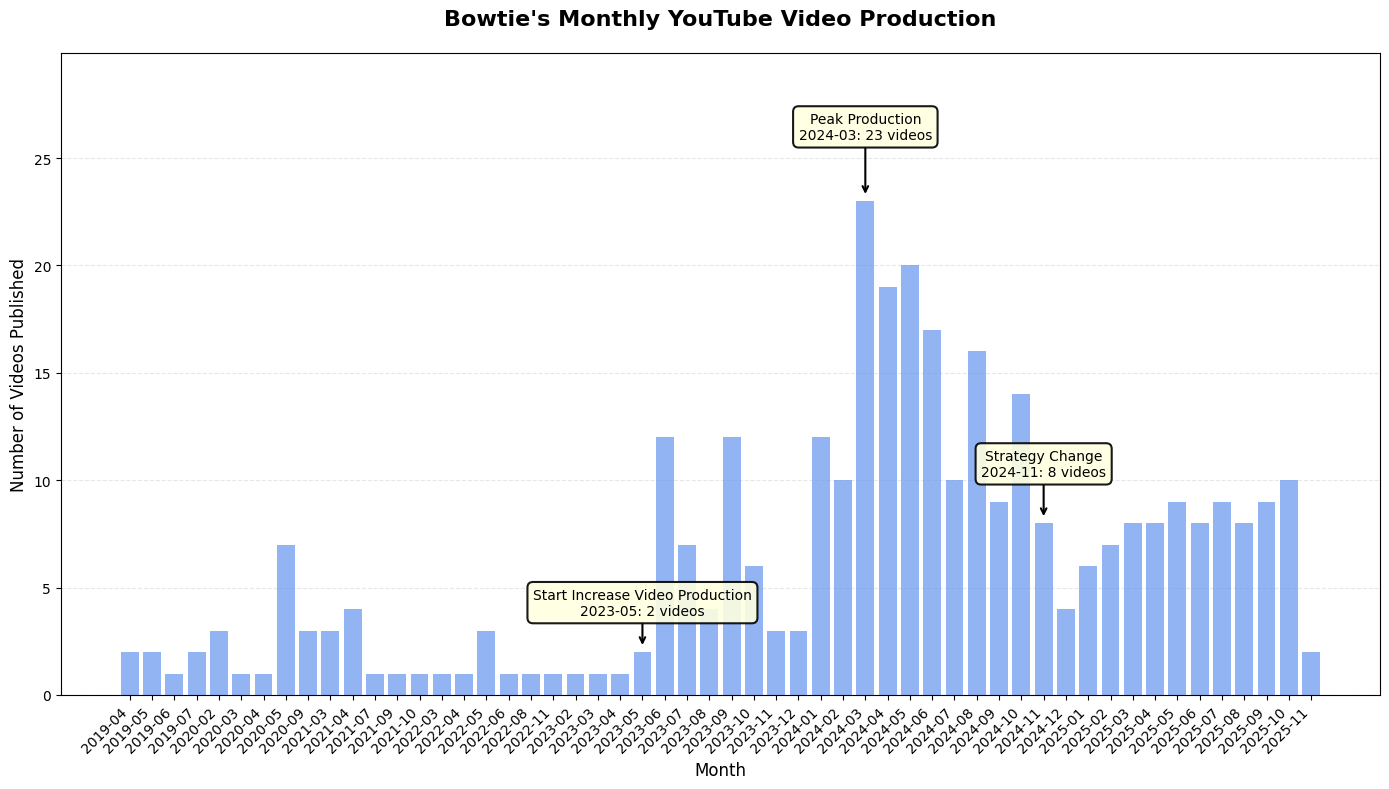

In [10]:
# Plots
# Create str version for x-axis to avoid datetime conversion issues
df_time_series_plot = df_time_series.copy()
df_time_series_plot['publication_month_str'] = df_time_series_plot['publication_month'].dt.strftime('%Y-%m')

# --- Visualization with Consistent Annotations ---
fig, ax = plt.subplots(figsize=(14, 8))  # Slightly larger for better spacing

# Create the bar plot
bars = ax.bar(
    df_time_series_plot['publication_month_str'],
    df_time_series_plot['video_count'],
    color='cornflowerblue',
    alpha=0.7
)

# Consistent annotation style parameters
ANNOTATION_STYLE = {
    'fontsize': 10,
    'ha': 'center',
    'va': 'center',
    'bbox': dict(boxstyle="round,pad=0.4", fc="lightyellow", ec="black", lw=1.5, alpha=0.9),
    'arrowprops': dict(arrowstyle="->", color='black', lw=1.5, shrinkA=0, shrinkB=5)
}

# Find the peak for annotation
peak_month_str = df_time_series_plot.loc[df_time_series_plot['video_count'].idxmax(), 'publication_month_str']
peak_value = df_time_series_plot['video_count'].max()
peak_idx = list(df_time_series_plot['publication_month_str']).index(peak_month_str)

# Peak annotation - position above bar
ax.annotate(
    f"Peak Production\n{peak_month_str}: {peak_value} videos",
    xy=(peak_idx, peak_value),
    xytext=(peak_idx, peak_value + (peak_value * 0.15)),  # Fixed position above
    **ANNOTATION_STYLE
)

# Annotation for 2023-05: Start increase video production
if '2023-05' in df_time_series_plot['publication_month_str'].values:
    may_2023_idx = list(df_time_series_plot['publication_month_str']).index('2023-05')
    may_2023_count = df_time_series_plot.loc[may_2023_idx, 'video_count']
    
    ax.annotate(
        f"Start Increase Video Production\n2023-05: {may_2023_count} videos",
        xy=(may_2023_idx, may_2023_count),
        xytext=(may_2023_idx, may_2023_count + (peak_value * 0.1)),  # Consistent offset
        **ANNOTATION_STYLE
    )

# Annotation for 2024-11: Change strategy in video production
if '2024-11' in df_time_series_plot['publication_month_str'].values:
    nov_2024_idx = list(df_time_series_plot['publication_month_str']).index('2024-11')
    nov_2024_count = df_time_series_plot.loc[nov_2024_idx, 'video_count']
    
    ax.annotate(
        f"Strategy Change\n2024-11: {nov_2024_count} videos",
        xy=(nov_2024_idx, nov_2024_count),
        xytext=(nov_2024_idx, nov_2024_count + (peak_value * 0.12)),  # Consistent offset
        **ANNOTATION_STYLE
    )

# Improve overall plot aesthetics
plt.title("Bowtie's Monthly YouTube Video Production", fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Videos Published", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add some grid lines for better readability
ax.grid(True, axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Adjust y-axis limit to accommodate annotations
max_count = df_time_series_plot['video_count'].max()
ax.set_ylim(0, max_count * 1.3)  # Leave space for annotations

plt.tight_layout()
plt.show()

### 2b. Do more input resource means more engagement?

In [11]:
query = """
SELECT
  TO_CHAR(v.published_at, 'YYYY-MM') AS month_year,
  COUNT(DISTINCT v.video_id) AS video_count,
  AVG(v.view_count) AS avg_views,
  AVG(v.like_count) AS avg_likes,
  AVG(v.comment_count) AS avg_video_comments, -- From videos table
  COALESCE(AVG(c.comment_count), 0) AS avg_comments_per_video, -- Handle no comments
  COALESCE(AVG(c.avg_vader_score), 0) AS avg_vader_score -- Handle no scores
FROM videos v
LEFT JOIN (
  SELECT
    video_id,
    COUNT(*) AS comment_count,
    COALESCE(AVG(vader_score), 0) AS avg_vader_score
  FROM comments
  GROUP BY video_id
) c ON v.video_id = c.video_id
WHERE v.channel_id = 'UCD5Lx-3KCYZzCzGF2A60STg'
  AND v.published_at >= '2024-01-01'::date
  AND v.published_at <= '2025-10-31'::date
GROUP BY TO_CHAR(v.published_at, 'YYYY-MM')
ORDER BY month_year ASC;
"""

with engine.connect() as conn:
    # Execute
    result = conn.execute(text(query))
  
    # Build DF with correct columns
    df_monthly = pd.DataFrame(result.fetchall(), columns=result.keys())

# Fix dtypes: convert numeric columns to float/int
numeric_cols = ['video_count', 'avg_views', 'avg_likes', 'avg_video_comments', 'avg_comments_per_video', 'avg_vader_score']
for col in numeric_cols:
    if col in df_monthly.columns:
        df_monthly[col] = pd.to_numeric(df_monthly[col], errors='coerce')

# Convert month_year to datetime and set as index
df_monthly['month_year'] = pd.to_datetime(df_monthly['month_year'])
df = df_monthly.set_index('month_year').sort_index()

print("Bowtie Monthly Engagement Breakdown (2024):")
display(df.round(2))  

Bowtie Monthly Engagement Breakdown (2024):


,video_count,avg_views,avg_likes,avg_video_comments,avg_comments_per_video,avg_vader_score
month_year,,,,,,
2024-01-01,12,18474.00,66.25,3.67,2.58,0.02
2024-02-01,10,51307.40,67.20,4.10,3.57,0.00
2024-03-01,23,205273.04,998.52,11.83,14.71,0.02
2024-04-01,19,16174.42,127.05,6.42,4.59,0.00
2024-05-01,20,9500.30,29.95,4.45,4.33,0.00
2024-06-01,17,4331.12,51.12,6.41,5.91,0.00
2024-07-01,10,1226.50,19.30,1.80,2.80,0.10
2024-08-01,16,13525.56,196.56,20.38,19.33,0.01
2024-09-01,9,119082.00,732.22,57.67,47.14,0.01


## [Insight in Correlation] More videos have negative effect to the engagement on bowties's channel
- When video count increases, Avg Views DECREASES slightly (r = -0.017)
- When video count increases, Avg Likes DECREASES moderately (r = -0.362)
- When video count increases, Avg Video Comments DECREASES moderately (r = -0.432)When video count increases, Avg Comments Per Video DECREASES moderately (r = -0.416)

In [12]:
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = ['Arial Unicode MS', 'Arial', 'Apple Color Emoji', 'DejaVu Sans']
import warnings
warnings.filterwarnings('ignore', message='Glyph .* missing from font')

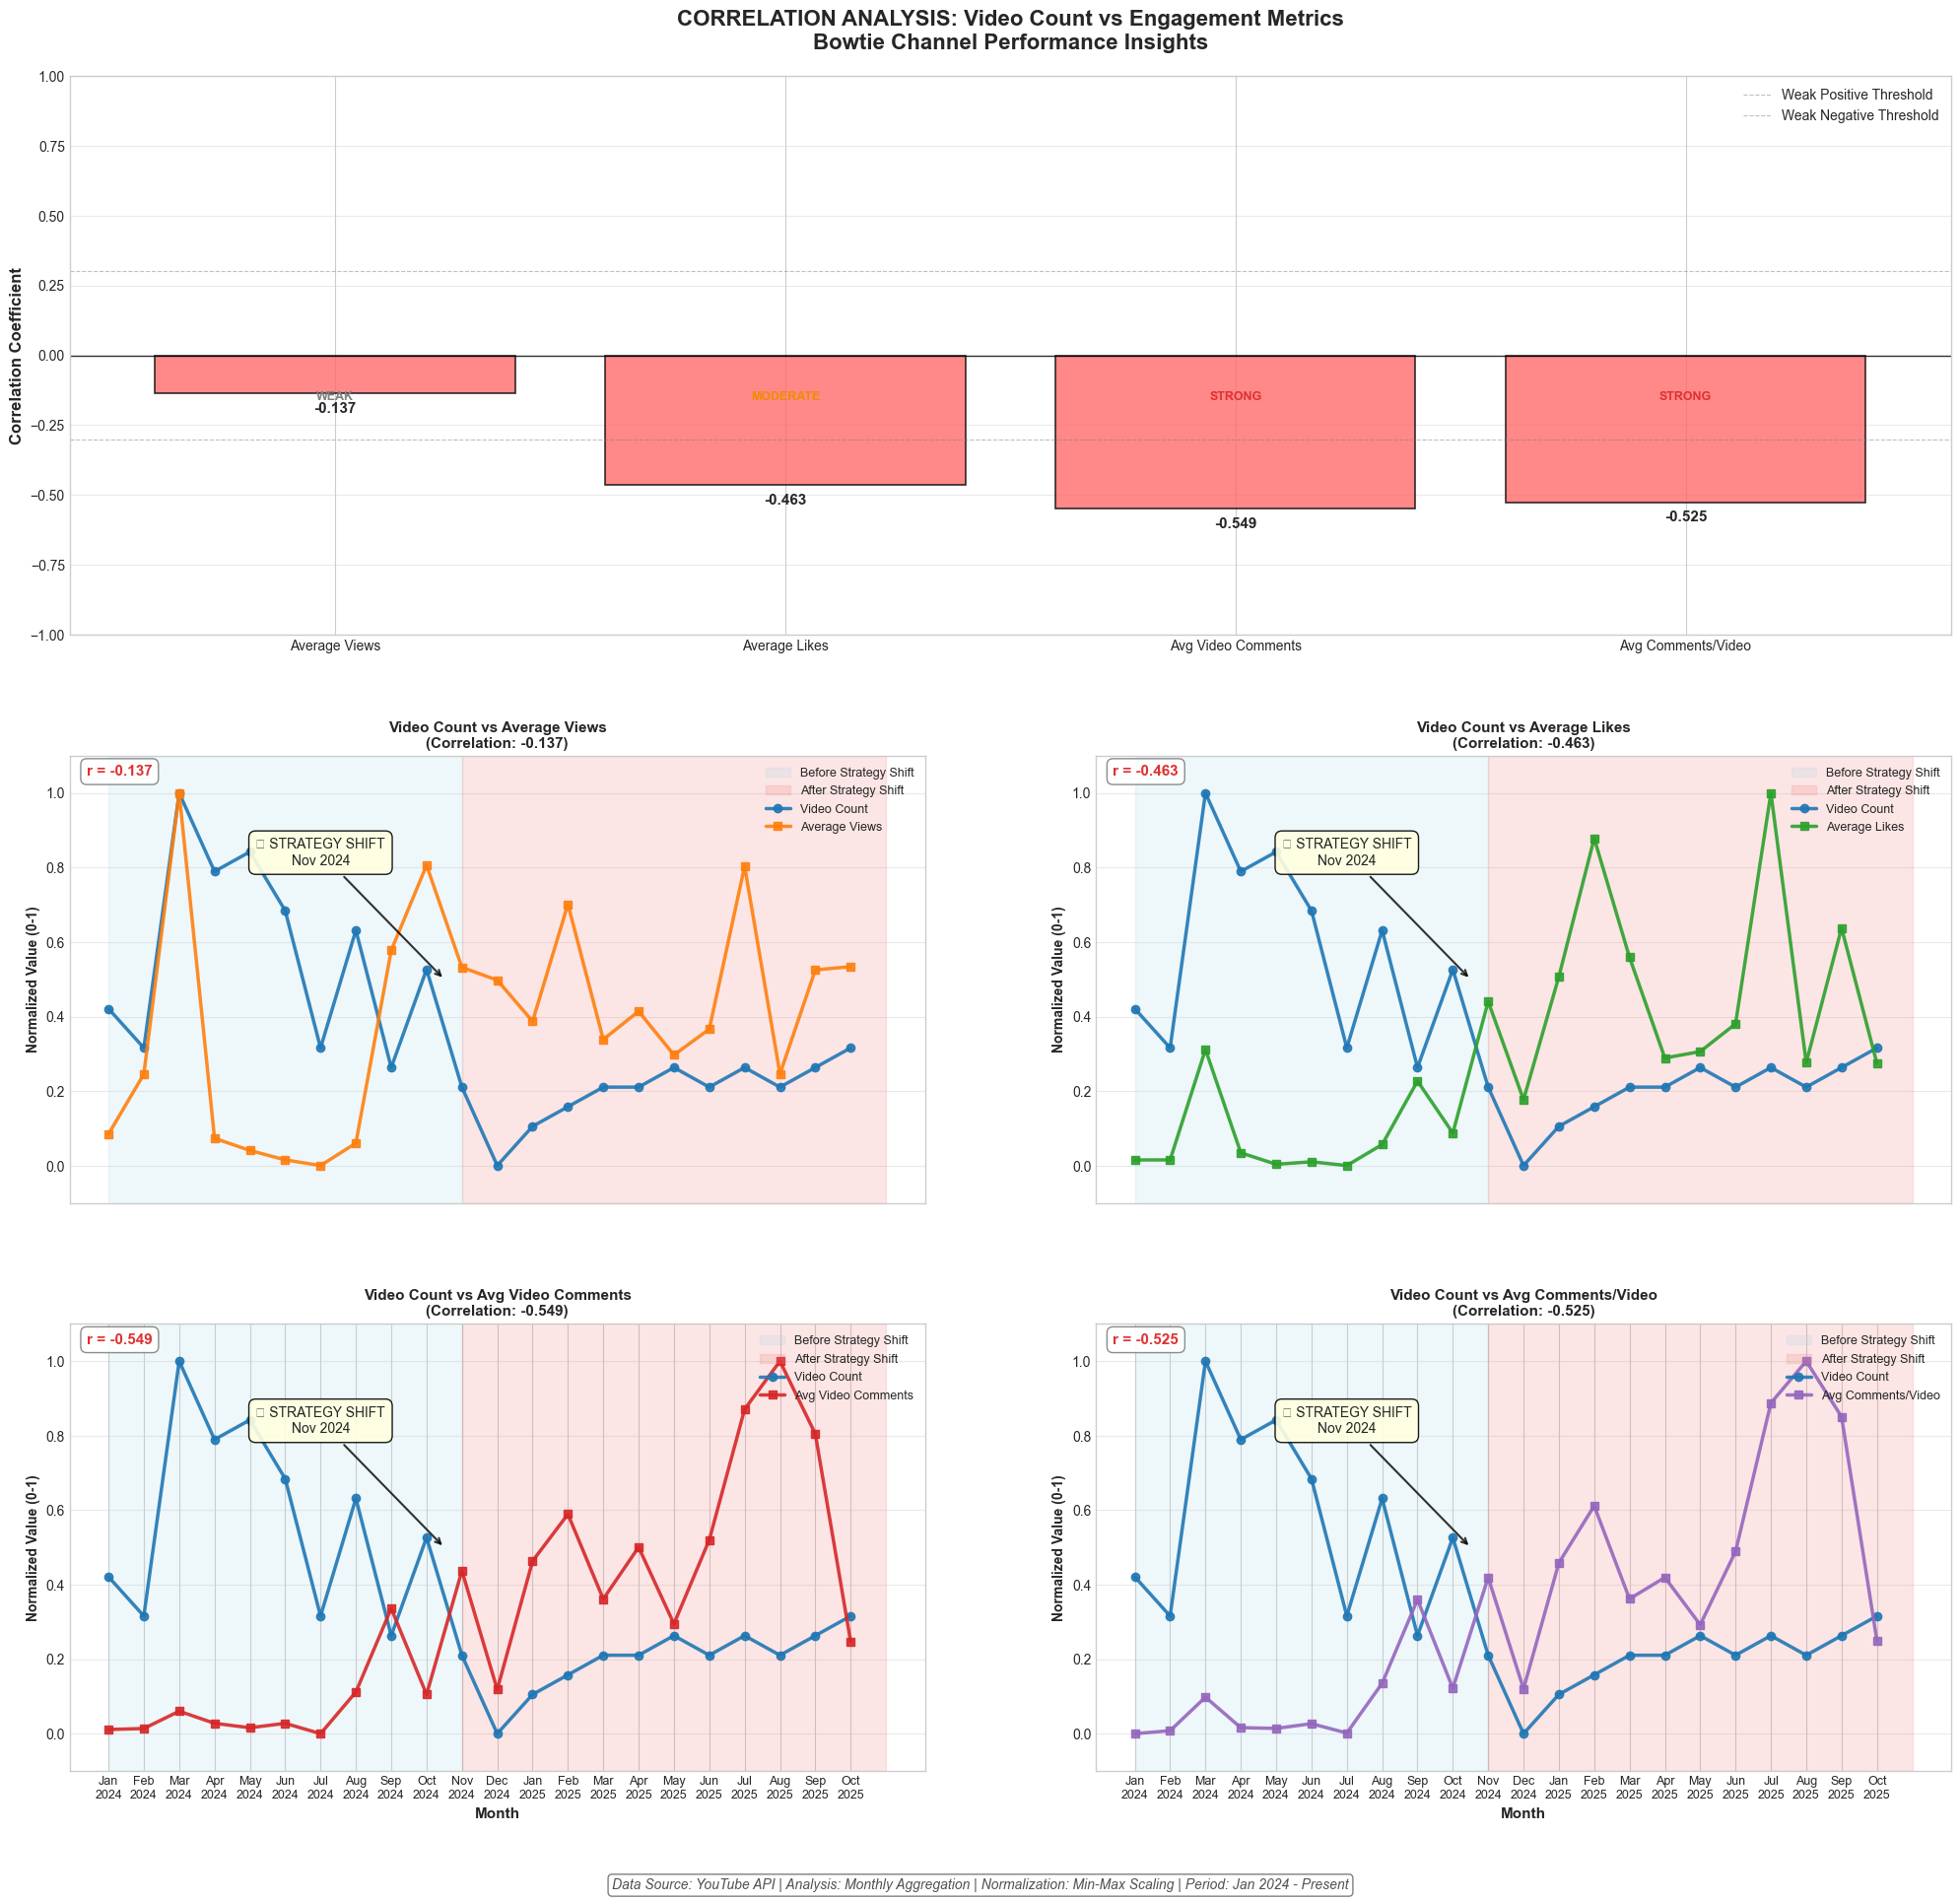

In [13]:
# Set professional style
plt.style.use('seaborn-v0_8-whitegrid')

fig = plt.figure(figsize=(20, 20))  # Increased height from 16 to 20
# Create grid layout for professional report
gs = GridSpec(3, 2, figure=fig, height_ratios=[1.5, 1.2, 1.2])  # Increased ratios for more grid height

# =============================================================================
# PART 1: CORRELATION ANALYSIS - Top section spanning both columns
# =============================================================================
ax1 = fig.add_subplot(gs[0, :])
# Compute correlations
engagement_metrics = ['avg_views', 'avg_likes', 'avg_video_comments', 'avg_comments_per_video']
correlations = {}
for metric in engagement_metrics:
    corr = df_monthly['video_count'].corr(df_monthly[metric])
    correlations[metric] = corr

# Plot correlations with enhanced styling
metrics_display = ['Average Views', 'Average Likes', 'Avg Video Comments', 'Avg Comments/Video']
corr_values = [correlations[metric] for metric in engagement_metrics]
colors = ['#ff6b6b' if val < 0 else '#51cf66' if val > 0.1 else '#ffd43b' for val in corr_values]
bars = ax1.bar(metrics_display, corr_values, color=colors, alpha=0.8,
               edgecolor='black', linewidth=1.2)

# Customize the correlation plot
ax1.set_title('CORRELATION ANALYSIS: Video Count vs Engagement Metrics\nBowtie Channel Performance Insights',
              fontsize=16, fontweight='bold', pad=20)
ax1.set_ylabel('Correlation Coefficient', fontsize=12, fontweight='bold')
ax1.set_ylim(-1, 1)
ax1.axhline(y=0, color='black', linestyle='-', alpha=0.8, linewidth=1)
ax1.axhline(y=0.3, color='gray', linestyle='--', alpha=0.5, linewidth=0.8, label='Weak Positive Threshold')
ax1.axhline(y=-0.3, color='gray', linestyle='--', alpha=0.5, linewidth=0.8, label='Weak Negative Threshold')
ax1.grid(axis='y', alpha=0.4)

# Add value labels and significance indicators
for bar, val, metric in zip(bars, corr_values, engagement_metrics):
    height = bar.get_height()
    va = 'bottom' if height >= 0 else 'top'
    y_pos = height + 0.02 if height >= 0 else height - 0.03
    ax1.text(bar.get_x() + bar.get_width()/2, y_pos,
             f'{val:.3f}', ha='center', va=va, fontweight='bold', fontsize=11)
   
    # Add significance marker
    if abs(val) > 0.5:
        significance = "STRONG"
        color = "#e03131" if val < 0 else "#2f9e44"
    elif abs(val) > 0.3:
        significance = "MODERATE"
        color = "#f08c00" if val < 0 else "#37b24d"
    else:
        significance = "WEAK"
        color = "gray"
   
    ax1.text(bar.get_x() + bar.get_width()/2, -0.15, significance,
             ha='center', va='center', fontweight='bold', color=color, fontsize=9)

# Add insight annotation with consistent styling
insight_text = "📊 INSIGHT: Negative correlations suggest that publishing more videos may dilute engagement per video.\nHigher video frequency correlates with lower average viewer interaction across all metrics."
ax1.text(0.02, -0.85, insight_text, transform=ax1.transAxes, fontsize=12,
         style='italic', bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8))
ax1.legend(loc='upper right')

# =============================================================================
# PART 2: NORMALIZED TIME SERIES COMPARISONS - Bottom 2x2 grid
# =============================================================================
# Normalize data function
def normalize_column(series):
    min_val = series.min()
    max_val = series.max()
    if max_val > min_val:
        return (series - min_val) / (max_val - min_val)
    else:
        return series * 0

# Prepare comparison data
df_comparison = df_monthly.copy().set_index('month_year')
df_comparison['video_count_norm'] = normalize_column(df_comparison['video_count'])
df_comparison['avg_views_norm'] = normalize_column(df_comparison['avg_views'])
df_comparison['avg_likes_norm'] = normalize_column(df_comparison['avg_likes'])
df_comparison['avg_video_comments_norm'] = normalize_column(df_comparison['avg_video_comments'])
df_comparison['avg_comments_per_video_norm'] = normalize_column(df_comparison['avg_comments_per_video'])

# Find split position for background shading (before/after 2024-11)
split_date = pd.to_datetime('2024-11-01')
split_idx = df_comparison.index.get_loc(df_comparison[df_comparison.index >= split_date].index[0])
split_pos = split_idx  # Position for shading and annotation

# Create subplots for comparisons
axes = [
    fig.add_subplot(gs[1, 0]),
    fig.add_subplot(gs[1, 1]),
    fig.add_subplot(gs[2, 0]),
    fig.add_subplot(gs[2, 1])
]

# Configuration for each subplot
plot_configs = [
    ('avg_views_norm', 'Average Views', '#ff7f0e', correlations['avg_views']),
    ('avg_likes_norm', 'Average Likes', '#2ca02c', correlations['avg_likes']),
    ('avg_video_comments_norm', 'Avg Video Comments', '#d62728', correlations['avg_video_comments']),
    ('avg_comments_per_video_norm', 'Avg Comments/Video', '#9467bd', correlations['avg_comments_per_video'])
]

# Plot each comparison
x_pos = np.arange(len(df_comparison))
for idx, (metric_col, metric_name, color, corr) in enumerate(plot_configs):
    ax = axes[idx]
  
    # Add background shading with consistent alpha and colors
    ax.axvspan(0, split_pos, color='lightblue', alpha=0.2, label='Before Strategy Shift')
    ax.axvspan(split_pos, len(df_comparison), color='lightcoral', alpha=0.2, label='After Strategy Shift')
  
    # Plot lines instead of bars
    ax.plot(x_pos, df_comparison['video_count_norm'], label='Video Count', 
            color='#1f77b4', linewidth=2.5, marker='o', markersize=6, alpha=0.9)
    ax.plot(x_pos, df_comparison[metric_col], label=metric_name, 
            color=color, linewidth=2.5, marker='s', markersize=6, alpha=0.9)
  
    # Add annotation with consistent styling to match the report
    annotation_text = "🎯 STRATEGY SHIFT\nNov 2024"
    # Position annotation consistently across all subplots
    ax.annotate(annotation_text, 
                xy=(split_pos - 0.5, 0.5),  # Target point near the split
                xytext=(split_pos - 4, 0.8),  # Text position
                arrowprops=dict(arrowstyle='->', color='black', lw=1.5, alpha=0.8),
                fontsize=10, 
                ha='center', 
                va='bottom',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.9, edgecolor='black'),
                transform=ax.transData)
  
    # Customize subplot with consistent styling
    ax.set_title(f'Video Count vs {metric_name}\n(Correlation: {corr:.3f})',
                 fontweight='bold', fontsize=11)
    ax.set_ylabel('Normalized Value (0-1)', fontsize=10, fontweight='bold')
    ax.legend(fontsize=9, loc='upper right')
    ax.grid(axis='y', alpha=0.4)
  
    # Set consistent y-axis limits for better comparison
    ax.set_ylim(-0.1, 1.1)
  
    # Set x-axis labels for bottom row only with consistent formatting
    if idx >= 2:
        ax.set_xticks(x_pos)
        ax.set_xticklabels([month.strftime('%b\n%Y') for month in df_comparison.index],
                          fontsize=9, rotation=0)
        ax.set_xlabel('Month', fontsize=11, fontweight='bold')
    else:
        ax.set_xticks([])
        # Remove x-axis for top row but keep the grid
        ax.tick_params(axis='x', which='both', bottom=False, top=False)
  
    # Add correlation indicator with consistent styling
    correlation_color = '#e03131' if corr < 0 else '#2f9e44' if corr > 0.3 else '#f08c00'
    ax.text(0.02, 0.98, f'r = {corr:.3f}', transform=ax.transAxes,
            fontsize=11, fontweight='bold', va='top', color=correlation_color,
            bbox=dict(boxstyle="round,pad=0.4", facecolor="white", alpha=0.9, edgecolor='gray'))

# =============================================================================
# FINAL TOUCHES
# =============================================================================

plt.tight_layout()
plt.subplots_adjust(top=0.94, hspace=0.25, wspace=0.2, bottom=0.08)  # Adjusted for new insights section

# Footer with consistent styling
footer_text = "Data Source: YouTube API | Analysis: Monthly Aggregation | Normalization: Min-Max Scaling | Period: Jan 2024 - Present"
fig.text(0.5, 0.02, footer_text, ha='center', fontsize=10, style='italic', alpha=0.8,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.5))

plt.show()

## How many comments Bowtie has?

In [14]:
query = """
SELECT
  COUNT(DISTINCT c.comment_id) AS total_comments
FROM comments c
JOIN videos v ON c.video_id = v.video_id
WHERE v.channel_id = 'UCD5Lx-3KCYZzCzGF2A60STg'
"""

with engine.connect() as conn:
    # Execute
    result = conn.execute(text(query))
    
    # Fetch and build DF
    df_monthly = pd.DataFrame(result.fetchall(), columns=result.keys())
    print(df_monthly)  # Outputs a DataFrame with one row/column

   total_comments
0            8004


## more tags increase visibility

In [15]:
import pandas as pd
from sqlalchemy import text
from sqlalchemy.exc import SQLAlchemyError

query = """
SELECT *
FROM videos v  -- Added alias 'v' here
WHERE v.channel_id = 'UCD5Lx-3KCYZzCzGF2A60STg'  -- Now 'v' is defined
ORDER BY v.published_at DESC;  -- Add sort if you have a date col (from schema); swap with real col
"""

try:
    with engine.connect() as conn:
        result = conn.execute(text(query))
        df_monthly = pd.DataFrame(result.fetchall(), columns=result.keys())
    print(f"Success! Fetched {len(df_monthly)} videos.")
    print(df_monthly.head())  # Preview first 5 rows
except SQLAlchemyError as e:
    print(f"SQL Error: {e}")

Success! Fetched 338 videos.
      video_id                channel_id           channel_name  \
0  yyZVVi07oEU  UCD5Lx-3KCYZzCzGF2A60STg  Bowtie Insurance 保泰人壽   
1  tEoC8aiTD34  UCD5Lx-3KCYZzCzGF2A60STg  Bowtie Insurance 保泰人壽   
2  pm8wTYBP9-4  UCD5Lx-3KCYZzCzGF2A60STg  Bowtie Insurance 保泰人壽   
3  _kbMsIsugbg  UCD5Lx-3KCYZzCzGF2A60STg  Bowtie Insurance 保泰人壽   
4  WVrccSRYCmM  UCD5Lx-3KCYZzCzGF2A60STg  Bowtie Insurance 保泰人壽   

                                               title        published_at  \
0  日本藥妝店 去水腫 保健食品 = 智商稅 ？｜實測 5秒 水腫測試 皮膚凹陷 可能係 大病 ... 2025-11-06 11:01:05   
1  財務自由 都要面對 婚姻 危機 + 移民 困境 + 仔女 問題！揭開 我要做富翁 3大掙扎！... 2025-11-04 10:30:45   
2  保險孤兒單 自救 Q&A | 1個真實個案 賠償＄0 收場！5成 保險代理 3年內消失！揭秘... 2025-10-30 11:01:42   
3  人生「 完結 」、「 圓滿 」定「 緣份 」 ？ 臨終 病人靠 前妻 照顧，善寧之家 院長 ... 2025-10-27 11:01:12   
4  朋友喪親，唔識安慰？講多錯多，不如學識「呢 3 招」｜善寧之家 院長 黃嘉然｜ #Bowti... 2025-10-24 11:01:01   

   view_count  like_count  comment_count  duration  
0       15354         323              8      1227  
1    